# Analysis of Novel Coronavirus 2019 

### Content
+ Introduction: Novel coronavirus 2019
+ Data description
+ Research questions
+ Data preparation: cleaning and shaping
+ Data visualization
+ Conclusion

## 1. Introduction: COVID-19

2019-nCoV or COVID-19 (2019 Novel Coronavirus) is a virus identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people.

There is an ongoing investigation to determine more about this outbreak. This is a rapidly evolving situation and information will be updated as it becomes available. The latest situation summary updates are available on CDC’s web page for COVID-19.

Source(https://www.cdc.gov/library/researchguides/2019NovelCoronavirus.html)

## 2. Data description

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.

The data is available from 22 Jan, 2020.

The detailed description of the variables in this dataset is below:
+ Sno - Serial number
+ ObservationDate - Date of the observation in MM/DD/YYYY
+ Province/State - Province or state of the observation (Could be empty when missing)
+ Country/Region - Country of observation
+ Last Update - Time in UTC at which the row is updated for the given province or country. (Not standardised and so please clean before using it)
+ Confirmed - Cumulative number of confirmed cases till that date
+ Deaths - Cumulative number of of deaths till that date
+ Recovered - Cumulative number of recovered cases till that date

## 3. Research questions

Research questions for the project:
1. Analyze daily information about cases of coronavirus by period of time
2. Analyze the regions that were mostly affected by covid-19
3. Analyze the spread of coronavirus infection worldwide
4. Analyze the mortality and survival rates of covid-19 by regions
5. Analyze The spread of coronavirus infection by province

## 4. Data preparation: cleaning and shaping

In [127]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

In [128]:
# import dataset
cov = pd.read_csv('covid_19_data.csv')

In [129]:
# number of rows, columns, data types, memory usage information
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116805 entries, 0 to 116804
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              116805 non-null  int64  
 1   ObservationDate  116805 non-null  object 
 2   Province/State   81452 non-null   object 
 3   Country/Region   116805 non-null  object 
 4   Last Update      116805 non-null  object 
 5   Confirmed        116805 non-null  float64
 6   Deaths           116805 non-null  float64
 7   Recovered        116805 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 7.1+ MB


So we obtain the following information:
1. There are 116805 records and 8 columns
2. There are missing values in Province/State column

In [130]:
# dropping
cov = cov.dropna()

In [131]:
# show dataset
cov

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
116800,116801,09/23/2020,Zaporizhia Oblast,Ukraine,2020-09-24 04:23:38,3149.0,49.0,1158.0
116801,116802,09/23/2020,Zeeland,Netherlands,2020-09-24 04:23:38,1270.0,72.0,0.0
116802,116803,09/23/2020,Zhejiang,Mainland China,2020-09-24 04:23:38,1282.0,1.0,1272.0
116803,116804,09/23/2020,Zhytomyr Oblast,Ukraine,2020-09-24 04:23:38,5191.0,92.0,2853.0


In [132]:
# describe numerical columns
cov.describe()

,SNo,Confirmed,Deaths,Recovered
count,81452.000000,8.145200e+04,81452.000000,8.145200e+04
mean,63020.428056,1.950380e+04,802.709105,1.114304e+04
std,32304.171786,6.044557e+04,2780.366795,7.052453e+04
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,37698.750000,3.150000e+02,3.000000,0.000000e+00
50%,64318.500000,2.622000e+03,52.000000,3.490000e+02
75%,90562.250000,1.064950e+04,406.000000,3.655250e+03
max,116805.000000,1.242770e+06,42072.000000,2.670256e+06


From the description above we can obtain:
- the total count of confirmed and recovered cases, and deaths;
- mean value for each of the columns;
- min and max values.

### Data cleaning and shaping

In [133]:
# check if there are still any NaN values
df=pd.DataFrame(cov)
print(df.isnull().any(axis=1).sum())

0


We checked for missing values and found the sum of total number of them. From this we can obtain that there are no NaN values in the dataset 

In [134]:
# check if there any duplicates
duplicateRows = df[df.duplicated()]
print(duplicateRows.sum())

SNo                0.0
ObservationDate    0.0
Province/State     0.0
Country/Region     0.0
Last Update        0.0
Confirmed          0.0
Deaths             0.0
Recovered          0.0
dtype: float64


Duplicates are not found in the dataset

In [135]:
# number of confirmed,deaths,recovered cases have to be a whole number
df['Confirmed'] = df['Confirmed'].astype(int)
df['Deaths'] = df['Deaths'].astype(int)
df['Recovered'] = df['Recovered'].astype(int)
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...,...,...
116800,116801,09/23/2020,Zaporizhia Oblast,Ukraine,2020-09-24 04:23:38,3149,49,1158
116801,116802,09/23/2020,Zeeland,Netherlands,2020-09-24 04:23:38,1270,72,0
116802,116803,09/23/2020,Zhejiang,Mainland China,2020-09-24 04:23:38,1282,1,1272
116803,116804,09/23/2020,Zhytomyr Oblast,Ukraine,2020-09-24 04:23:38,5191,92,2853


In [184]:
# rename column name
df=pd.DataFrame(cov)
df['Country/Region'] = df.rename(columns = {'Country/Region':'Region'}, inplace = True) 
df['Province/State'] = df.rename(columns = {'Province/State':'Province'}, inplace = True)

In [185]:
# see the changes 
drop=(['Country/Region', 'Province/State'])
df.drop(drop,axis='columns',inplace=True)
df

,SNo,ObservationDate,Province,Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...,...,...
116800,116801,09/23/2020,Zaporizhia Oblast,Ukraine,2020-09-24 04:23:38,3149,49,1158
116801,116802,09/23/2020,Zeeland,Netherlands,2020-09-24 04:23:38,1270,72,0
116802,116803,09/23/2020,Zhejiang,Mainland China,2020-09-24 04:23:38,1282,1,1272
116803,116804,09/23/2020,Zhytomyr Oblast,Ukraine,2020-09-24 04:23:38,5191,92,2853


## 5. Data visualization 

In this section, I will respond to the research questions by data visualization

### 5.1 Q1: Distribution of daily information about cases of coronavirus by period of time

In [186]:
# Changing the datatype of column to datetime
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
# Extracting of month values from the column
df['month'] = df['ObservationDate'].dt.month
# Getting the number of daily information by the regions in month
month_count = df.groupby('month')['SNo'].nunique().sort_values(ascending = False)
month_count

month
8    17804
7    17573
6    16278
9    13205
5     6706
4     4173
3     3750
2     1573
1      390
Name: SNo, dtype: int64

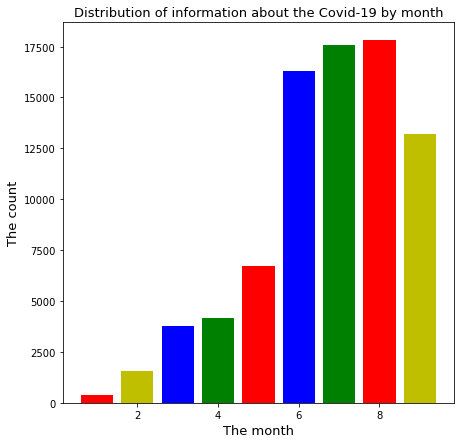

In [187]:
# The barplot of distribution of information about the Covid-19 by month
plot.figure(figsize = (7,7))
colors=['r','g','b','y']
plot.bar(month_count.index,month_count,color = colors)
plot.title('Distribution of information about the Covid-19 by month',fontsize = 13)
plot.xlabel('The month', fontsize = 13)
plot.ylabel('The count', fontsize = 13)
plot.show()

The 8th month of calendar (August) had the highest distribution of daily cases of coronavirus, while the 1st month (January) had the least distrubution. The distribution has been raising month by month except for September.

### 5.2 Q2: Distribution of the regions that were mostly affected by covid-19

In [188]:
# select Region column
country = df["Region"]
country

0         Mainland China
1         Mainland China
2         Mainland China
3         Mainland China
4         Mainland China
               ...      
116800           Ukraine
116801       Netherlands
116802    Mainland China
116803           Ukraine
116804       Netherlands
Name: Region, Length: 81452, dtype: object

In [189]:
# describe the column
country.describe()

count     81452
unique       30
top          US
freq      12356
Name: Region, dtype: object

There are 81452 values overall for the region names and 30 of them are unique. The top one is the United States, which appears with the frequency of 12356 times.

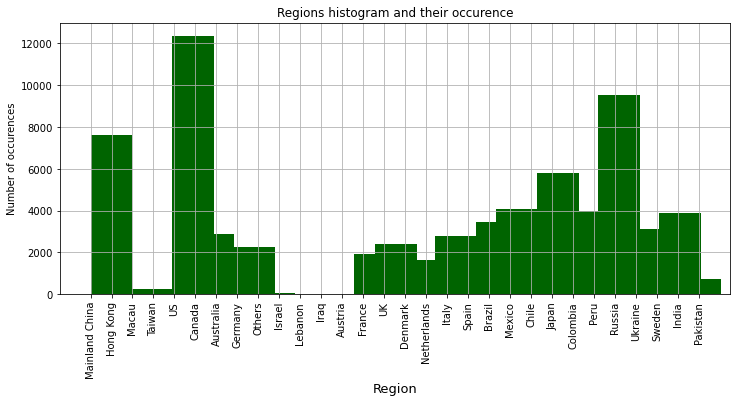

In [190]:
# histogram of countries in the list and their occurence
plot.figure(figsize = (12,5))
plot.hist(df["Region"], bins=30, width = 2.0, range=None, align='mid', color = 'darkgreen')
plot.xlabel("Region", fontsize=13)
plot.xticks(rotation='vertical')
plot.ylabel("Number of occurences")
plot.title("Regions histogram and their occurence")
plot.ylim(0, 13000)
plot.grid(True)

plot.show()

The histogram shows the distribution of occurences per country. The United States has a leading amount with more than 12000 occurences. The data for different countries can be easily obtained from the constructed histogram. 

### 5.3 Q3: Distribution of the spread of coronavirus infection worldwide

In [191]:
# output the number of confirmed cases 
confirmed = df["Confirmed"].value_counts()
confirmed

0        1098
1        1095
13        526
2         424
5         382
         ... 
6778        1
8357        1
14502       1
16553       1
10725       1
Name: Confirmed, Length: 26373, dtype: int64

In [192]:
# describe the confirmed column
confirmed.describe()

count    26373.000000
mean         3.088462
std         14.055197
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       1098.000000
Name: Confirmed, dtype: float64

The maximum number of confirmed cases is 1098, while the minimum has a value of 1. The mean number of cases per observation date is 3 as shown in the descriptive statistics above.

In [213]:
# covid-19 overall cases
cases = df[['Confirmed', 'Recovered', 'Deaths']]
cases = cases.sum().reset_index() # the total sum
cases

,index,0
0,Confirmed,1588623641
1,Recovered,907622539
2,Deaths,65382262


Text(0.5, 1.0, 'The distribution of COVID-19 cases')

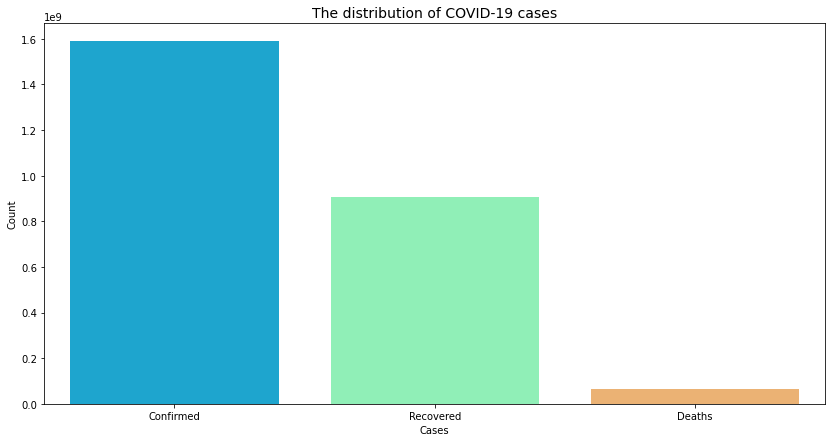

In [214]:
# covid-19 cases barplot
plot.figure(figsize = (14,7))
ax = sns.barplot(x='index', y=0, data=cases, palette = 'rainbow')
plot.xlabel(xlabel='Cases')
plot.ylabel(ylabel='Count')
plot.title('The distribution of COVID-19 cases', fontsize = 14)

In [217]:
# no of cases per country
covid_case = df['Region'].value_counts()
covid_case

US                12356
Russia             9545
Mainland China     7624
Japan              5780
Mexico             4064
Colombia           3987
India              3874
Brazil             3448
Ukraine            3105
Peru               3094
Canada             2870
Italy              2793
Spain              2655
UK                 2402
Sweden             2331
Germany            2265
Chile              2159
France             1917
Australia          1801
Netherlands        1648
Pakistan            742
Denmark             397
Macau               246
Hong Kong           246
Taiwan               49
Others               46
Israel                5
Austria               1
Lebanon               1
Iraq                  1
Name: Region, dtype: int64

Text(0.5, 1.0, 'The distribution of confirmed cases worldwide')

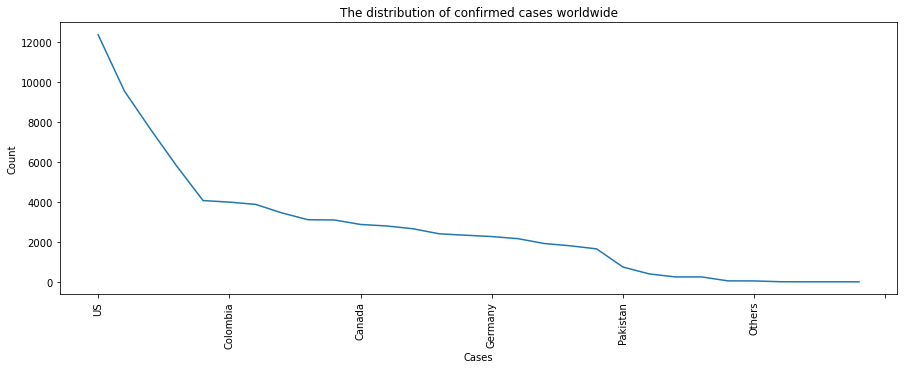

In [218]:
# confirmed cases worldwide
plot.figure(figsize = (15,5))
covid_case.plot(x='Region', y='Confirmed')
plot.xlabel(xlabel='Cases')
plot.xticks(rotation='vertical')
plot.ylabel(ylabel='Count')
plot.title('The distribution of confirmed cases worldwide')

The plot above shows the number of confirmed cases of coronavirus. It is clearly seen that US has the leading amount of total cases.

Text(0.5, 1.0, 'The distribution of recovered cases worldwide')

<Figure size 1080x360 with 0 Axes>

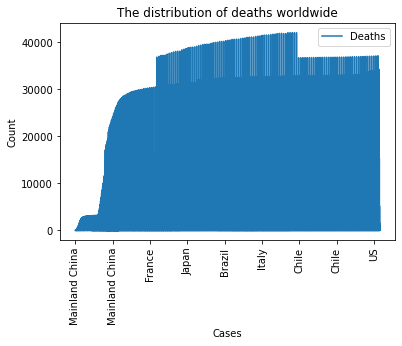

<Figure size 1080x360 with 0 Axes>

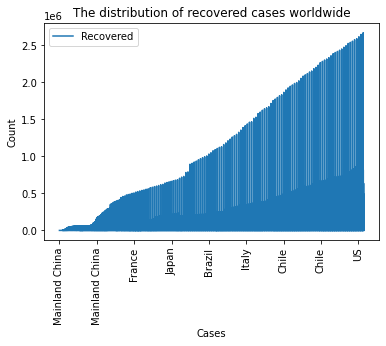

In [219]:
# deaths from covid-19 worldwide
plot.figure(figsize = (15,5))
df.plot(x='Region', y='Deaths')
plot.xlabel(xlabel='Cases')
plot.xticks(rotation='vertical')
plot.ylabel(ylabel='Count')
plot.title('The distribution of deaths worldwide')

# recovered cases worldwide 
plot.figure(figsize = (15,5))
df.plot(x='Region', y='Recovered')
plot.xlabel(xlabel='Cases')
plot.xticks(rotation='vertical')
plot.ylabel(ylabel='Count')
plot.title('The distribution of recovered cases worldwide')

The two plots above show:
    1. The distribution of deaths worldwide. It is seen that Italy and Chile both have a high rate of deaths from coronavirus. 
    2. The distribution of recovered cases. Even though the United States have a high level of confirmed cases, at the same time it also leads in the number of recovered cases.    

### 5.4 Q4: Distribution of mortality and survival rates of covid-19 by regions

In [220]:
# The sum of the confirmed,recovered and death cases by regions
country_df = df.groupby('Region')[['Confirmed','Deaths','Recovered']].sum()
country_df = country_df.reset_index()
# Mortality rate by coronavirus
country_df['Mortality Rate'] = country_df['Deaths']/country_df['Confirmed']

# Survival rate by coronavirus
country_df['Survival Rate'] = country_df['Recovered']/country_df['Confirmed']

# Sort of regions in descending order by confirmed cases 
country_df = country_df.sort_values(by =['Confirmed'],ascending= False)
country_df.head(10)

,Region,Confirmed,Deaths,Recovered,Mortality Rate,Survival Rate
28,US,557588267,21189260,174911575,0.038002,0.313693
2,Brazil,297340239,10372224,228422161,0.034883,0.768218
10,India,232665080,4461787,170879012,0.019177,0.734442
23,Russia,92100432,1489951,67826876,0.016177,0.736445
22,Peru,51063362,2109366,34984937,0.041309,0.685128
18,Mexico,46990252,5187951,37632338,0.110405,0.800854
24,Spain,44040748,3784005,19979553,0.085921,0.453661
4,Chile,38584161,946923,34432252,0.024542,0.892393
5,Colombia,38045590,1243064,25624235,0.032673,0.673514
27,UK,33780049,4586006,220940,0.135761,0.006541


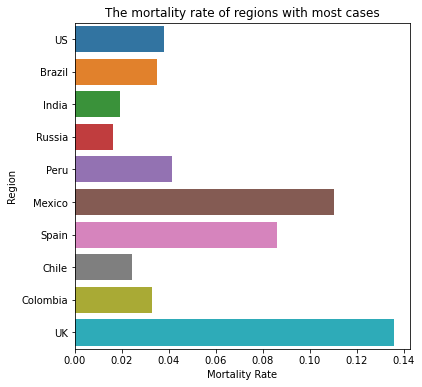

In [221]:
# The barplot with the top 10 regions by mortality rate
fig, ax = plot.subplots(figsize = (6,6))
plot.title('The mortality rate of regions with most cases')
sns.barplot(y = country_df['Region'][:10],x = country_df['Mortality Rate'][:10])

The leader by mortality rate is UK and after that goes Mexico. 

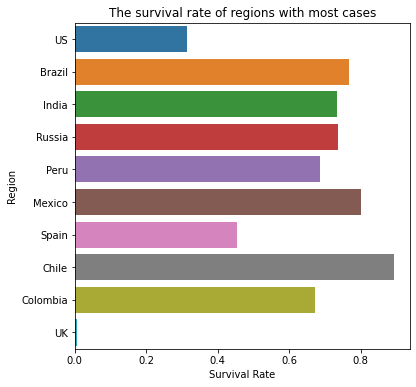

In [222]:
# The barplot with the top 10 regions by survival rate
fig, ax = plot.subplots(figsize = (6,6))
plot.title('The survival rate of regions with most cases')
sns.barplot(y = country_df['Region'][:10],x = country_df['Survival Rate'][:10])

The biggest survival rate can be seen from Chile and the survival rate of UK is very low.

### 5.5 Q5: The spread of coronavirus by province

In [224]:
# The number of provinces in the dataset
num_of_provinces = len(df.groupby('Province')['Region'].nunique())
print('The number of unique provinces in the dataset is ' + str(num_of_provinces))

The number of unique provinces in the dataset is 723


In [225]:
# The sum of the confirmed,recovered and death cases by provinces
province = df.groupby(['Province','Region'])[['Confirmed','Deaths','Recovered']].sum()
province = province.reset_index()
province['Mortality Rate'] = province['Deaths']/province['Confirmed']
# Sort of regions in descending order by confirmed cases 
province = province.sort_values(by =['Confirmed','Deaths','Recovered'],ascending= False)
province.head(10)

,Province,Region,Confirmed,Deaths,Recovered,Mortality Rate
432,New York,US,64874086,4970781,0,0.076622
571,Sao Paulo,Brazil,61027382,2579103,41032384,0.042261
88,California,US,56105927,1194451,40,0.021289
365,Maharashtra,India,53940053,1757974,36369938,0.032591
185,Florida,US,47161074,893489,0,0.018945
631,Texas,US,47070897,879892,0,0.018693
623,Tamil Nadu,India,28118938,457240,22809919,0.016261
429,New Jersey,US,27550042,2146882,2,0.077927
387,Metropolitana,Chile,27522074,742476,21245751,0.026977
409,Moscow,Russia,27406778,487441,20206449,0.017785


In [226]:
province['Province'].value_counts()

Unknown                         10
Diamond Princess cruise ship     4
None                             3
Amazonas                         3
Recovered                        2
                                ..
Nebraska                         1
Veracruz                         1
Mato Grosso                      1
Zuid-Holland                     1
Toronto, ON                      1
Name: Province, Length: 723, dtype: int64

From the information above, we can see that there are some provinces who have the same name, like Amazonas and Diamond Princess.

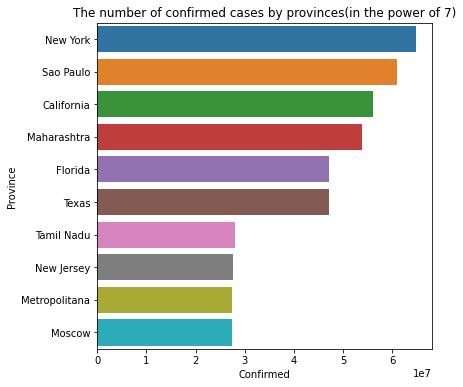

In [227]:
fig, ax = plot.subplots(figsize = (6,6))
ax.set_title('The number of confirmed cases by provinces(in the power of 7)')
ax.set_xlabel('The number of confirmed cases')
sns.barplot(x=province['Confirmed'][:10],y=province['Province'][:10])
plot.show()

The highest number of confirmed cases by province is New York and after that goes Sao Paulo.

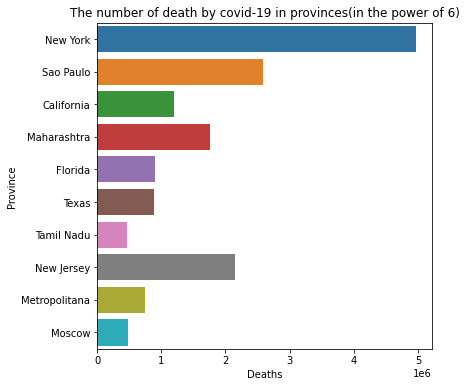

In [228]:
fig, ax = plot.subplots(figsize = (6,6))
plot.title('The number of death by covid-19 in provinces(in the power of 6)')
plot.xlabel('The number of deaths')
sns.barplot(x=province['Deaths'][:10],y=province['Province'][:10])


The highest number of deaths by covid-19 in provinces is being at New York.

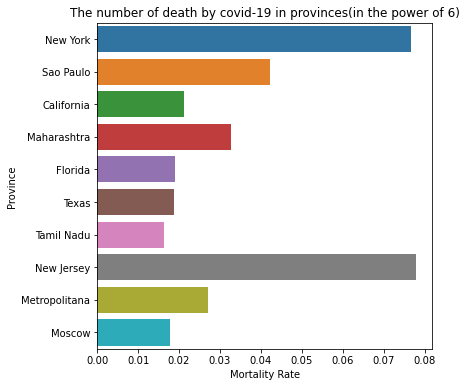

In [229]:
fig, ax = plot.subplots(figsize = (6,6))
plot.title('The number of death by covid-19 in provinces(in the power of 6)')
plot.xlabel('The mortality rate')
sns.barplot(x=province['Mortality Rate'][:10],y=province['Province'][:10])

The highest level of mortality rate can be seen in New Jersey and New York, while the mortality rate in New Jersey is a bit smaller than in New York.

## 6. Conclusion

Based on the analysis I have done about the novel covid-19 infection, I can make several conclusions:

First, the number of coronavirus infection observations were increasing day by day for the past 8 months (january to august) with the peak number in August. However, the observations got lower in September meaning that the infection had become less severe. 

Second, there are 30 unique countries in the list. The United States has appeared in the list more than 12 thousand times being the most infected region in the world so far.

Third, the spread of coronavirus worldwide is splitted into three categories: confirmed cases, recovered cases, and deaths. Overall, for all the countries presented in the list the number of recovered cases is much more than deaths.

Fourth, by looking at the mortality rate we can identify that the highest death rate belongs to the United Kingdom, while the highest survival rate is in Chile.

Finally, by analyzing coronavirus spread in different provinces, we end up with the conclusion that New York has the highest number of confirmed cases as well as deaths. It leads us to the obvious conclusion that New York is also top 1 in terms of mortality rate. New Jersey is the second province by covid-19 mortality rate.